New red QSO Code

In [29]:
#imports placed here
import os
import pickle 
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scripts import rgbImageGenerator
import glob
import shutil
import copy
import re

colour datapoints: 11
G values: 11,R values: 11,I values: 11
Average chi 2 values:
G values: 3.685522523251491,R values: 11.308294432670552,I values: 35.524462034778104
chi std
G values: 3.1999455226253652,R values: 13.44343959985294,I values: 29.012301126048477
The mean reduced chi squared is 0.469 with a standard deviation 0.141
The median reduced chi squared is 0.433
object list with reduced chi square value above 2:
{'G': ['39627652490857032', '39627670568314673', '39627896758735663', '39627736897033394', '39627745415661526', '39627751094747557', '39627815557011818'], 'R': ['39627899921240501', '39627652490857032', '39627670568314673', '39627896758735663', '39627749140204970', '39627736897033394', '39627745415661526', '39627751094747557', '39627815557011818'], 'I': ['39627899921240501', '39627652490857032', '39627670568314673', '39627896758735663', '39627749140204970', '39627751509987377', '39627736897033394', '39627745415661526', '39627751094747557', '39627815557011818', '39627908

Text(0.5, 0, 'magnitude')

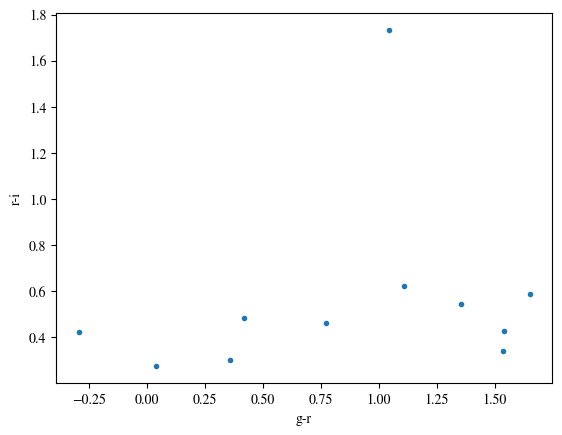

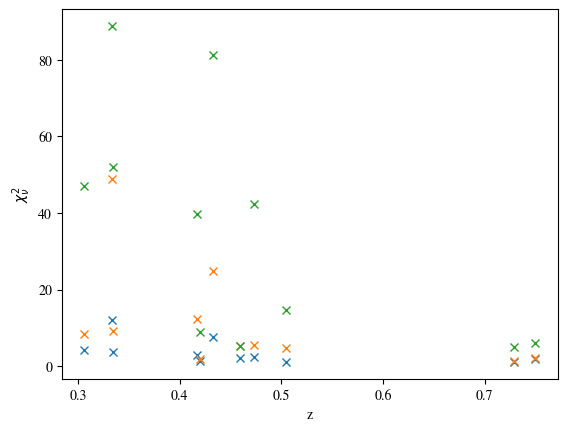

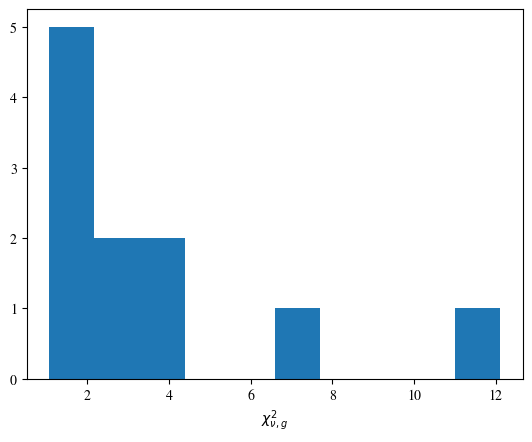

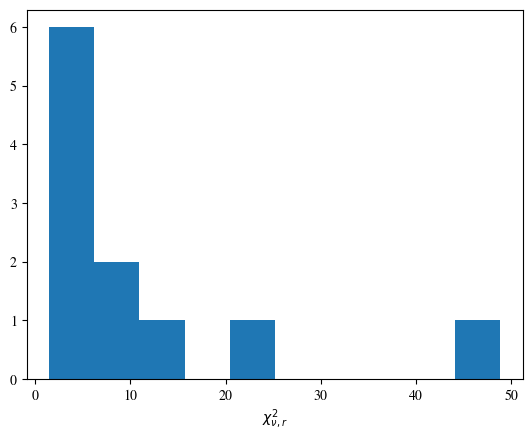

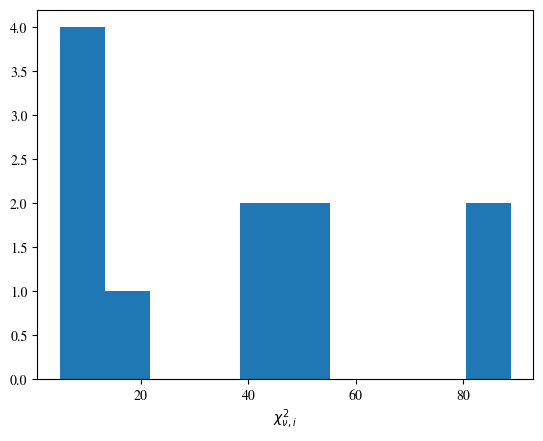

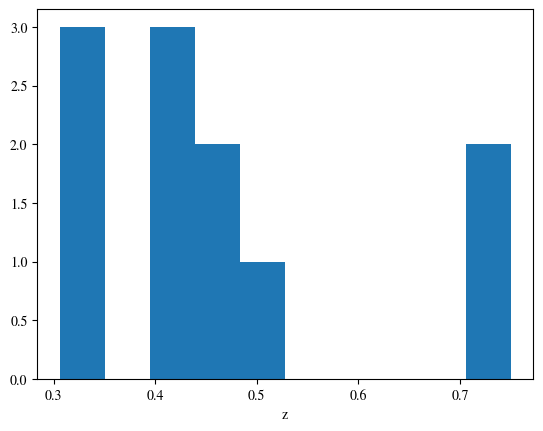

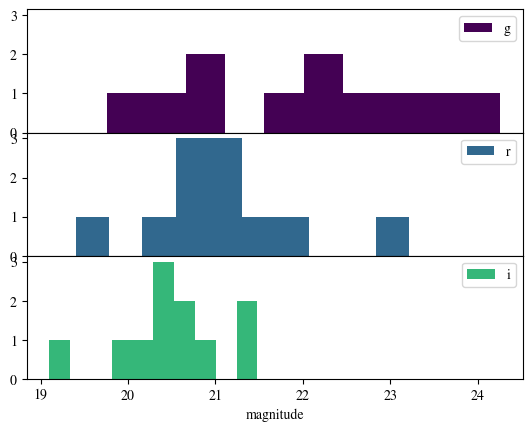

In [6]:
#Here we will inspect the contents of the pickle files for fits which exclude the host component
#first get a list of directory contents and catalogue:
import matplotlib


fileAddress = "results/desitargets/excludinghost"
catalogue = pd.read_csv("data/DESICatalogue.csv")
objID = []
files = list(os.listdir(fileAddress))
reducedChiSquareds = {"G":[],"R":[],"I":[]}
highChiSquareObjects = {"G":[],"R":[],"I":[]}
magnitudes = {"G":[],"R":[],"I":[]}
Zs = []
fluxMag0 = 63095734448.01944
for file in files:
    #check that the file is a directory:
    if "." in file:
        continue
    pklFiles = glob.glob(f"{fileAddress}/{file}/fitting_results/*.pkl")
    if len(pklFiles) == 0:
        print(f"No .pkl files found for {file}")
        continue 
    obj_No = list(catalogue["DESI_ID"]).index(int(file))
    objID.append(obj_No)
    z = list(catalogue["Z_DESI"])[obj_No]
    Zs.append(z)
    bandsForObject = ""
    for pickleFile in pklFiles:
        bandsForObject += f"{pickleFile[-5]}"
        output = pickle.load(open(pickleFile,"rb"))
        #print(output.final_result_ps)
        #print(output.reduced_Chisq)
        magnitudes[pickleFile[-5].upper()].append(output.final_result_ps[0]["magnitude"])
        reducedChiSquareds[pickleFile[-5].upper()].append(output.reduced_Chisq)
        if output.reduced_Chisq >= 2:
            highChiSquareObjects[pickleFile[-5].upper()].append(file)
        
    for band in ["g","r","i"]:
        if band not in bandsForObject:
            reducedChiSquareds[band.upper()].append(-1) #appending invalid value to represent missing data
            magnitudes[band.upper()].append(-1)
#colour statistics

GRColour = []
RIColour = []
#want g-r colour and r-i colour from set with complete results
for i, j in enumerate(magnitudes["G"]):
    #check that all bands have valid data
    if -1 in [magnitudes["G"][i],magnitudes["R"][i],magnitudes["I"][i]]:
        #ignore this index if -1 is in this gri set
        continue
    GRColour.append(magnitudes["G"][i] - magnitudes["R"][i])
    RIColour.append(magnitudes["R"][i] - magnitudes["I"][i])
print(f"colour datapoints: {len(GRColour)}")

#Counting
#G, R, I number of results, average chi2
ValidOutputs = {"G":[mag for mag in magnitudes["G"] if mag != -1],
                "R":[mag for mag in magnitudes["R"] if mag != -1],
                "I":[mag for mag in magnitudes["I"] if mag != -1]}
ValidOutputsChi = {"G":[chi for chi in reducedChiSquareds["G"] if chi != -1],
                "R":[chi for chi in reducedChiSquareds["R"] if chi != -1],
                "I":[chi for chi in reducedChiSquareds["I"] if chi != -1]}
print(f"G values: {len(ValidOutputs["G"])},R values: {len(ValidOutputs["R"])},I values: {len(ValidOutputs["I"])}")
print("Average chi 2 values:")
print(f"G values: {np.mean(ValidOutputsChi["G"])},R values: {np.mean(ValidOutputsChi["R"])},I values: {np.mean(ValidOutputsChi["I"])}")
print("chi std")
print(f"G values: {np.std(ValidOutputsChi["G"])},R values: {np.std(ValidOutputsChi["R"])},I values: {np.std(ValidOutputsChi["I"])}")
#plt.ylim(top=2,bottom=-1)
plt.plot(GRColour,RIColour,linestyle="None",marker=".")
plt.xlabel("g-r")
plt.ylabel("r-i")
#chi2 statistics
print(f"The mean reduced chi squared is {round(np.mean(Zs),3)} with a standard deviation {round(np.std(Zs),3)}")
print(f"The median reduced chi squared is {round(np.median(Zs),3)}")
print("object list with reduced chi square value above 2:")
print(highChiSquareObjects)
#rgbImageGenerator.generateImages(highChiSquareObjects["I"],r"rgbimages/highChiSquare",r"data/images") #image generation of high chi square objects
print(f"{len(highChiSquareObjects["G"])} g band objects with reduced chi square values over 2")
print(f"{len(highChiSquareObjects["R"])} r band objects with reduced chi square values over 2")
print(f"{len(highChiSquareObjects["I"])} i band objects with reduced chi square values over 2")
#displaying plots:
plt.figure()
plt.plot(Zs,reducedChiSquareds["G"],linestyle="None",marker="x",label="g")
plt.plot(Zs,reducedChiSquareds["R"],linestyle="None",marker="x",label="r")
plt.plot(Zs,reducedChiSquareds["I"],linestyle="None",marker="x",label="i")
plt.xlabel("z")
plt.ylabel(r"$\chi^{2}_{\nu}$")
plt.figure()
plt.xlabel(r"$\chi^{2}_{\nu, g}$")
plt.hist(reducedChiSquareds["G"])
plt.figure()
plt.xlabel(r"$\chi^{2}_{\nu, r}$")
plt.hist(reducedChiSquareds["R"])
plt.figure()
plt.xlabel(r"$\chi^{2}_{\nu, i}$")
plt.hist(reducedChiSquareds["I"])
plt.figure()
plt.hist(Zs)
plt.xlabel("z")
print(f"{min(Zs)} < z < {max(Zs)}")
print(f"{min(ValidOutputs['G'])} < m(g) < {max(ValidOutputs['G'])}")
print(f"{min(ValidOutputs['R'])} < m(r) < {max(ValidOutputs['R'])}")
print(f"{min(ValidOutputs['I'])} < m(i) < {max(ValidOutputs['I'])}")
stackedPlot = plt.figure()
cmap = matplotlib.colormaps['viridis']
colors = cmap(np.linspace(0, 1, 4))
gs = stackedPlot.add_gridspec(3, hspace=0)
axs = gs.subplots(sharex=True, sharey=True)
axs[0].hist(ValidOutputs["G"],label="g",color=colors[0])
axs[0].legend(loc="best")
axs[1].hist(ValidOutputs["R"],label="r",color=colors[1])
axs[1].legend(loc="best")
axs[2].hist(ValidOutputs["I"],label="i",color=colors[2])
axs[2].legend(loc="best")
axs[2].set_xlabel("magnitude")

In [26]:
#Want to collect final plots for high chi 2 outputs
outputDirectory = r"results/cut50/excludinghost"
files = list(os.listdir(outputDirectory))
for file in files:
    if file in highChiSquareObjects["G"]:
        shutil.copyfile(f"{outputDirectory}/{file}/fitting_results/{file}-result-band-g_qso_final_plot.pdf",f"plots/GBand/{file}-result-band-g_qso_final_plot.pdf")
    if file in highChiSquareObjects["R"]:
        shutil.copyfile(f"{outputDirectory}/{file}/fitting_results/{file}-result-band-r_qso_final_plot.pdf",f"plots/RBand/{file}-result-band-r_qso_final_plot.pdf")
    if file in highChiSquareObjects["I"]:
        shutil.copyfile(f"{outputDirectory}/{file}/fitting_results/{file}-result-band-i_qso_final_plot.pdf",f"plots/IBand/{file}-result-band-i_qso_final_plot.pdf")
    else:
        continue

{'G': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'R': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'I': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
39627877838225923
Largest improvement in G band: 39627736897033394
Largest improvement in R band: 39627736897033394
Largest improvement in I band: 39627736897033394


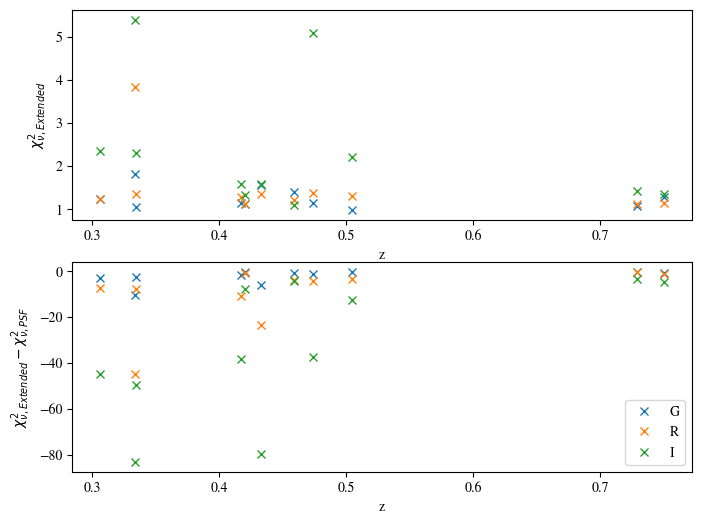

In [7]:
#Comparing chi2 change when adding a host component
#collect the objects in the bands where their chi2 is high from folder of host-decomposed results
resultFolder = r"results/desitargets/includinghost"
objID_Host = {"G":[],"R":[],"I":[]}
reducedChiSquareds_Host = {"G":[],"R":[],"I":[]}
highChiSquareObjects_Host = {"G":[],"R":[],"I":[]}
magnitudes_Host = {"G":[],"R":[],"I":[]}
QSOmagnitudes_Host = {"G":[],"R":[],"I":[]}
Zs_host = {"G":[],"R":[],"I":[]}
fluxMag0 = 63095734448.01944
for file in list(os.listdir(resultFolder)):
    #check that the file is a directory:
    if "." in file:
        continue
    pklFiles = glob.glob(f"{resultFolder}/{file}/fitting_results/*.pkl")
    if len(pklFiles) == 0:
        print(f"No .pkl files found for {file}")
        continue 
    obj_No = list(catalogue["DESI_ID"]).index(int(file))
    z = list(catalogue["Z_DESI"])[obj_No]
    
    bandsForObject = ""
    for pickleFile in pklFiles:
        bandsForObject += f"{pickleFile[-5]}"
        output = pickle.load(open(pickleFile,"rb"))
        #print(output.final_result_ps)
        #print(output.final_result_galaxy)
        #print(output.reduced_Chisq)
        Zs_host[pickleFile[-5].upper()].append(z)
        QSOmagnitudes_Host[pickleFile[-5].upper()].append(output.final_result_ps[0]["magnitude"])
        magnitudes_Host[pickleFile[-5].upper()].append(output.final_result_galaxy[0]["magnitude"])
        reducedChiSquareds_Host[pickleFile[-5].upper()].append(output.reduced_Chisq)
        objID_Host[pickleFile[-5].upper()].append(obj_No) # this will correspond to the index of the objects in the other list
        if output.reduced_Chisq >= 2:
            highChiSquareObjects_Host[pickleFile[-5].upper()].append(file)

#now compare values and collect galaxy fractions
chiDiff = {"G":[],"R":[],"I":[]}
improvedID = {"G":[],"R":[],"I":[]}
for band in ["G","R","I"]:
    for i, ID in enumerate(objID_Host[band]):
        chiDiff[band].append(reducedChiSquareds_Host[band][i]-reducedChiSquareds[band][ID])
        if chiDiff[band][-1] <= 0:
            improvedID[band].append(ID)

plt.figure(figsize=(8,6)) 
plt.subplot(2,1,1)
plt.plot(Zs_host["G"],reducedChiSquareds_Host["G"],linestyle="None",marker="x",label="G")
plt.plot(Zs_host["R"],reducedChiSquareds_Host["R"],linestyle="None",marker="x",label="R")
plt.plot(Zs_host["I"],reducedChiSquareds_Host["I"],linestyle="None",marker="x",label="I")
plt.xlabel("z")
plt.ylabel(r"$\chi^{2}_{\nu,Extended}$")
plt.subplot(2,1,2)
plt.plot(Zs_host["G"],chiDiff["G"],linestyle="None",marker="x",label="G")
plt.plot(Zs_host["R"],chiDiff["R"],linestyle="None",marker="x",label="R")
plt.plot(Zs_host["I"],chiDiff["I"],linestyle="None",marker="x",label="I")

plt.xlabel("z")
plt.ylabel(r"$\chi^{2}_{\nu,Extended} - \chi^{2}_{\nu,PSF}$")
plt.legend(loc="best")
print(improvedID)
print(list(os.listdir(r"results/cut50_ss/includinghost"))[9])

print(f"Largest improvement in G band: {list(os.listdir(r"results/desitargets/includinghost"))[np.where(chiDiff["G"] == min(chiDiff["G"]))[0][0]]}")
print(f"Largest improvement in R band: {list(os.listdir(r"results/desitargets/includinghost"))[np.where(chiDiff["R"] == min(chiDiff["R"]))[0][0]]}")
print(f"Largest improvement in I band: {list(os.listdir(r"results/desitargets/includinghost"))[np.where(chiDiff["I"] == min(chiDiff["I"]))[0][0]]}")

In [3]:
#Here will run the decomposition code for tests
from scripts import decomposition
imageDirectory = "data/images"
cataloguePath = r"data/RedQSOCatalogue.csv"
saveTo = r"results/cut50_ss/includinghost"
start = int(input("Start index: "))
stop = int(input("End index: "))
band = str(input("Band: "))
decomposition.galightDecompose(imageDirectory,cataloguePath,saveTo,True,start,stop,band,band)

KeyboardInterrupt: Interrupted by user

galaxy fraction from spectroscopy within g band filter bandwidth: 0.9033182341690281
expected galaxy fraction from hsc: 0.9084532404300038
galaxy fraction from hsc: 0.9132986202367864
Spectroscopy derived host magnitude if observed through hsc: 20.04198793066965
HSC image derived host magnitude 20.599818268016172


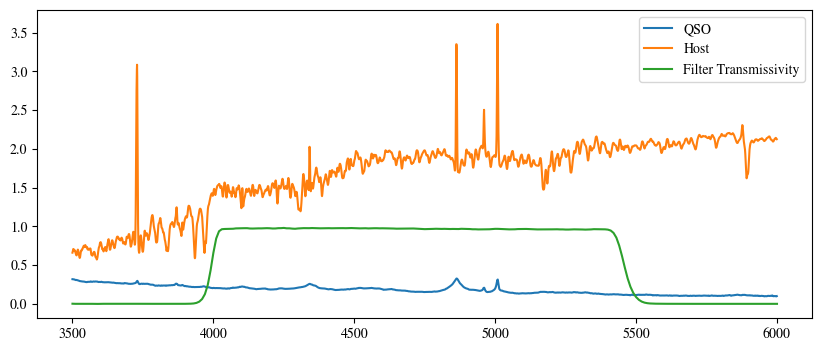

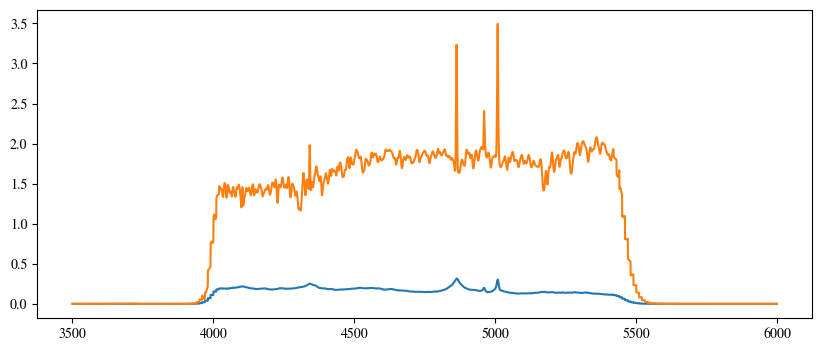

In [4]:
def toFlux(magnitude,zeroflux):
    return (zeroflux*(10**(-(magnitude)/(2.5))))
def toMagnitude(flux,zeroflux):
    return (-2.5)*np.log10(flux/zeroflux)

target = "39627736897033394"
wavelength,qso,host = np.loadtxt(f"results/PyQSOFit_test/{target}_data.csv",delimiter=",",unpack=True)
GBandWavelength,GBandTransmissivity = np.loadtxt("data/filters/g_band.csv",skiprows=1,unpack=True)

#first trim the spectrum data to only that within the bounds of the g band
abswavedifferenceMin,abswavedifferenceMax = np.abs(np.subtract(wavelength,min(GBandWavelength))),np.abs(np.subtract(wavelength,max(GBandWavelength)))
minIndex = np.where(abswavedifferenceMin == min(abswavedifferenceMin))[0][0]
maxIndex = np.where(abswavedifferenceMax == min(abswavedifferenceMax))[0][0]

wavelength = wavelength[minIndex:maxIndex]
qso = qso[minIndex:maxIndex]
host = host[minIndex:maxIndex]
#calculate the galaxy fraction from these values:
integratedqso = np.trapz(qso,wavelength)
integratedhost = np.trapz(host,wavelength)
spectroscopicGalaxyFraction = integratedhost/(integratedhost+integratedqso)
#now iterate over the trimmed wavelength to find the nearest transmissivity
interpolatedTransmissivity = []
for i,value in enumerate(wavelength):
    absdifference = abs(np.subtract(GBandWavelength,value))
    nearestIndex = np.where(absdifference == min(absdifference))[0][0]
    #spectroscopic data has a higher resolution than filter data - so find out if the target wavelength is larger or smaller
    #then, find the next or previous point which the target value should lie between. Interpolate linearly for the average value
    if value < GBandWavelength[nearestIndex]:
        if i != 0:
            secondIndex = nearestIndex-1
        else:
            secondIndex = copy.deepcopy(nearestIndex)
    else:
        if i != (len(wavelength)-1):
            secondIndex = nearestIndex+1
        else:
            secondIndex = copy.deepcopy(nearestIndex)
            
    interpolatedTransmissivity.append(np.average([GBandTransmissivity[nearestIndex],GBandTransmissivity[secondIndex]]))

#now adjust for transmissivity for what HSC would see
transAdjustedFluxQSO = np.multiply(qso,interpolatedTransmissivity)
transAdjustedFluxHost = np.multiply(host,interpolatedTransmissivity)

#now need to integrate over the transadjusted specific flux - using trapezoid rule
integratedQSOFlux = np.trapz(transAdjustedFluxQSO,wavelength)
integratedHostFlux = np.trapz(transAdjustedFluxHost,wavelength)

galaxyFraction = integratedHostFlux/(integratedHostFlux+integratedQSOFlux)

#compare to HSC
HSCResult = pickle.load(open(f"results/desitargets/includinghost/{target}/fitting_results/{target}-result-band-g.pkl","rb"))
fluxMag0 = 63095734448.01944
HSCGalaxyMagnitude = HSCResult.final_result_galaxy[0]["magnitude"]
HSCQSOMagnitude = HSCResult.final_result_ps[0]["magnitude"]
HSCHostFlux = toFlux(HSCGalaxyMagnitude,fluxMag0)
HSCQSOFlux = toFlux(HSCQSOMagnitude,fluxMag0)
HSCGalaxyFraction = HSCHostFlux/(HSCHostFlux+HSCQSOFlux)

print(f"galaxy fraction from spectroscopy within g band filter bandwidth: {spectroscopicGalaxyFraction}")
print(f"expected galaxy fraction from hsc: {galaxyFraction}")
print(f"galaxy fraction from hsc: {HSCGalaxyFraction}")

#to find the magnitude, need to convert fluxes to photon counts
photonCountsByWavelengthQSO = []
photonCountsByWavelengthHost = []
for i,x in enumerate(transAdjustedFluxQSO):
    energyPerPhotonSI = ((6.626e-34)*(3e8))/(wavelength[i]/1e10) # energy per photon in si units at this wavelength, converted wavelength to m from angstroms
    energyPerPhotonErgs = energyPerPhotonSI*1e7
    photonCountsByWavelengthQSO.append((transAdjustedFluxQSO[i]*10e-17)/energyPerPhotonErgs)
    photonCountsByWavelengthHost.append((transAdjustedFluxHost[i]*10e-17)/energyPerPhotonErgs)
photonCountsQSO = np.trapz(photonCountsByWavelengthQSO,wavelength)
photonCountsHost = np.trapz(photonCountsByWavelengthHost,wavelength)
#currently in photons/s/cm^2
QSOSpecMagnitude = toMagnitude(photonCountsQSO*10000,fluxMag0) #multiplying by 10,000 to go from photons/s/cm^2 to photons/s/m^2
HostSpecMagnitude = toMagnitude(photonCountsHost*10000,fluxMag0)

#now compare to HSC
print(f"Spectroscopy derived host magnitude if observed through hsc: {HostSpecMagnitude}")
print(f"HSC image derived host magnitude {HSCGalaxyMagnitude}")

#plotting
plt.figure(figsize=(10,4))
plt.plot(wavelength,qso,label="QSO")
plt.plot(wavelength,host,label="Host")
plt.plot(GBandWavelength,GBandTransmissivity,label="Filter Transmissivity")
plt.legend(loc="best")
plt.figure(figsize=(10,4))
plt.plot(wavelength,transAdjustedFluxQSO)
plt.plot(wavelength,transAdjustedFluxHost)

Mean difference: 0.010416336112164488+-0.22414021031901096


{'whiskers': [<matplotlib.lines.Line2D at 0x7fddfd4fb8c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fddfd50df10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fddfd4f9e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fddfd50c710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fddfd50d0a0>],
 'means': []}

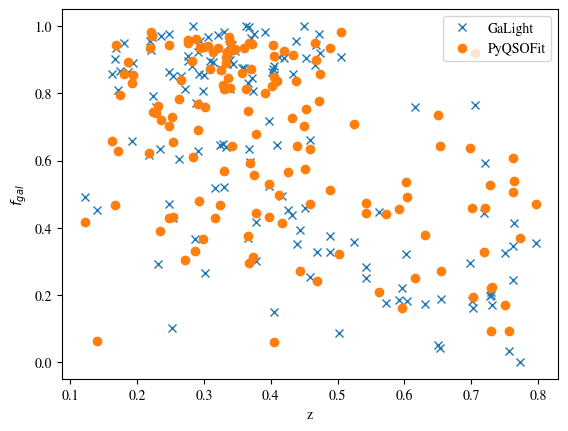

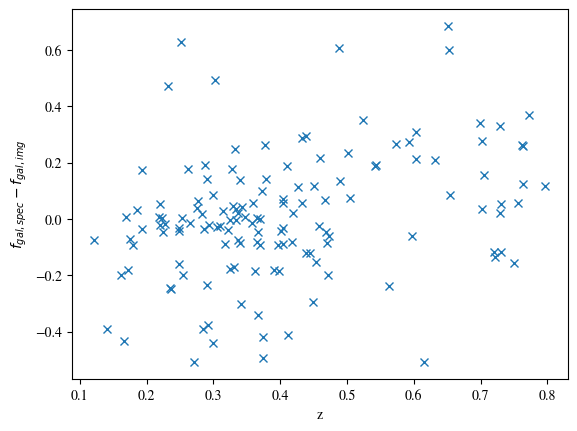

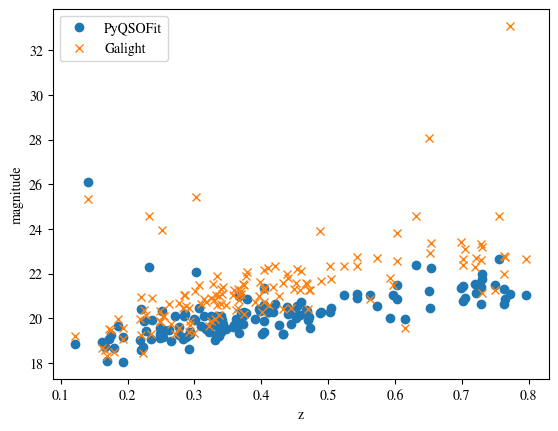

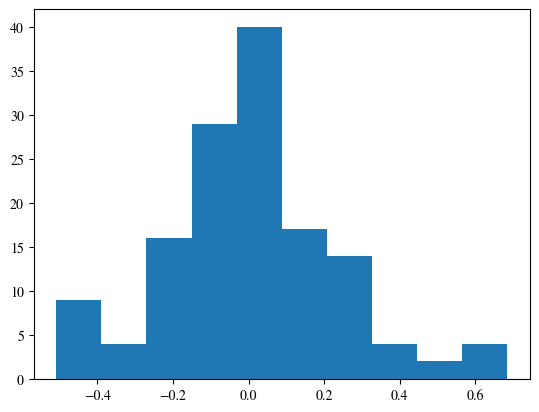

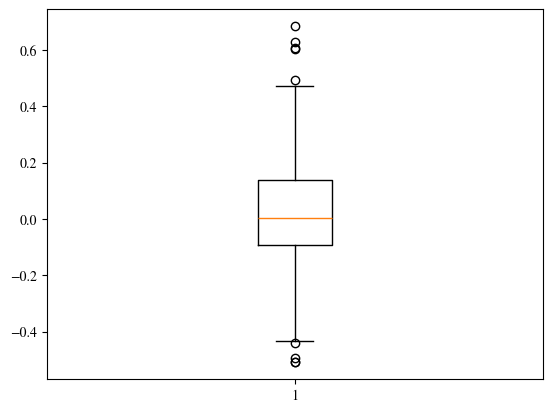

In [4]:
#automating above process

def toFlux(magnitude,zeroflux):
    return (zeroflux*(10**(-(magnitude)/(2.5))))
def toMagnitude(flux,zeroflux):
    return (-2.5)*np.log10(flux/zeroflux)
def CollectSpectroscopicData(target):
    wavelength,qso,host = np.loadtxt(f"results/PyQSOFit_test/{target}_data.csv",delimiter=",",unpack=True)
    GBandWavelength,GBandTransmissivity = np.loadtxt("data/filters/g_band.csv",skiprows=1,unpack=True)

    #first trim the spectrum data to only that within the bounds of the g band
    abswavedifferenceMin,abswavedifferenceMax = np.abs(np.subtract(wavelength,min(GBandWavelength))),np.abs(np.subtract(wavelength,max(GBandWavelength)))
    minIndex = np.where(abswavedifferenceMin == min(abswavedifferenceMin))[0][0]
    maxIndex = np.where(abswavedifferenceMax == min(abswavedifferenceMax))[0][0]

    wavelength = wavelength[minIndex:maxIndex]
    qso = qso[minIndex:maxIndex]
    host = host[minIndex:maxIndex]
    #calculate the galaxy fraction from these values:
    integratedqso = np.trapz(qso,wavelength)
    integratedhost = np.trapz(host,wavelength)
    spectroscopicGalaxyFraction = integratedhost/(integratedhost+integratedqso)
    #now iterate over the trimmed wavelength to find the nearest transmissivity
    interpolatedTransmissivity = []
    for i,value in enumerate(wavelength):
        absdifference = abs(np.subtract(GBandWavelength,value))
        nearestIndex = np.where(absdifference == min(absdifference))[0][0]
        #spectroscopic data has a higher resolution than filter data - so find out if the target wavelength is larger or smaller
        #then, find the next or previous point which the target value should lie between. Interpolate linearly for the average value
        if value < GBandWavelength[nearestIndex]:
            if i != 0:
                secondIndex = nearestIndex-1
            else:
                secondIndex = copy.deepcopy(nearestIndex)
        else:
            if i != (len(wavelength)-1):
                secondIndex = nearestIndex+1
            else:
                secondIndex = copy.deepcopy(nearestIndex)
                
        interpolatedTransmissivity.append(np.average([GBandTransmissivity[nearestIndex],GBandTransmissivity[secondIndex]]))

    #now adjust for transmissivity for what HSC would see
    transAdjustedFluxQSO = np.multiply(qso,interpolatedTransmissivity)
    transAdjustedFluxHost = np.multiply(host,interpolatedTransmissivity)

    #now need to integrate over the transadjusted specific flux - using trapezoid rule
    integratedQSOFlux = np.trapz(transAdjustedFluxQSO,wavelength)
    integratedHostFlux = np.trapz(transAdjustedFluxHost,wavelength)
    galaxyFraction = integratedHostFlux/(integratedHostFlux+integratedQSOFlux)
    #to find the magnitude, need to convert fluxes to photon counts
    photonCountsByWavelengthQSO = []
    photonCountsByWavelengthHost = []
    for i,x in enumerate(transAdjustedFluxQSO):
        energyPerPhotonSI = ((6.626e-34)*(3e8))/(wavelength[i]/1e10) # energy per photon in si units at this wavelength, converted wavelength to m from angstroms
        energyPerPhotonErgs = energyPerPhotonSI*1e7
        photonCountsByWavelengthQSO.append((transAdjustedFluxQSO[i]*10e-17)/energyPerPhotonErgs)
        photonCountsByWavelengthHost.append((transAdjustedFluxHost[i]*10e-17)/energyPerPhotonErgs)
    photonCountsQSO = np.trapz(photonCountsByWavelengthQSO,wavelength)
    photonCountsHost = np.trapz(photonCountsByWavelengthHost,wavelength)
    #currently in photons/s/cm^2
    fluxMag0 = 63095734448.01944
    QSOSpecMagnitude = toMagnitude(photonCountsQSO*10000,fluxMag0) #multiplying by 10,000 to go from photons/s/cm^2 to photons/s/m^2
    HostSpecMagnitude = toMagnitude(photonCountsHost*10000,fluxMag0)
    return {"host magnitude":HostSpecMagnitude,"qso magnitude":QSOSpecMagnitude,"galaxy fraction":galaxyFraction}


DESI_HSC = pd.read_csv('data/DESICatalogue.csv')
DESI_HSC['HSC_ID'] = DESI_HSC['HSC_ID'].astype(str)
targetList = obj_list = DESI_HSC['DESI_ID']
galaxyFractionSpec = []
galaxyFractionImage = []
specMagnitudeHost = []
imageMagnitudeHost = []
z = []
for target in targetList:
    try:
        spectroscopicResult = CollectSpectroscopicData(target)
        HSCResult = pickle.load(open(f"results/desitargets/includinghost/{target}/fitting_results/{target}-result-band-g.pkl","rb"))
    except FileNotFoundError:
        continue
    
    #compare to HSC
    fluxMag0 = 63095734448.01944
    HSCGalaxyMagnitude = HSCResult.final_result_galaxy[0]["magnitude"]
    HSCQSOMagnitude = HSCResult.final_result_ps[0]["magnitude"]
    HSCHostFlux = toFlux(HSCGalaxyMagnitude,fluxMag0)
    HSCQSOFlux = toFlux(HSCQSOMagnitude,fluxMag0)
    HSCGalaxyFraction = HSCHostFlux/(HSCHostFlux+HSCQSOFlux)
    galaxyFractionImage.append(HSCGalaxyFraction)
    obj_No = list(DESI_HSC["DESI_ID"]).index(int(target))
    
    galaxyFractionSpec.append(spectroscopicResult["galaxy fraction"])
    z.append(list(DESI_HSC["Z_DESI"])[obj_No])
    specMagnitudeHost.append(spectroscopicResult["host magnitude"])
    imageMagnitudeHost.append(HSCGalaxyMagnitude)
difference = np.subtract(np.array(galaxyFractionSpec),np.array(galaxyFractionImage))


plt.plot(z,galaxyFractionImage,linestyle="None",marker="x",label="GaLight")
plt.plot(z,galaxyFractionSpec,linestyle="None",marker="o",label="PyQSOFit")
plt.xlabel("z")
plt.ylabel(r"$f_{gal}$")
plt.legend(loc="best")
plt.figure()
plt.plot(z,difference,linestyle="None",marker="x")
plt.xlabel("z")
plt.ylabel(r"$f_{gal,spec} - f_{gal,img}$")
plt.figure()
plt.plot(z,specMagnitudeHost,linestyle="None",marker="o",label="PyQSOFit")
plt.plot(z,imageMagnitudeHost,linestyle="None",marker="x",label="Galight")
plt.legend(loc="best")
plt.xlabel("z")
plt.ylabel("magnitude")
plt.figure()
plt.hist(difference)
print(f"Mean difference: {np.mean(difference)}+-{np.std(difference)}")
plt.figure()
plt.boxplot(difference)

['39627899921240501_cont.csv', '39627652490857032_cont.csv', '39627670568314673_cont.csv', '39627896758735663_cont.csv', '39627749140204970_cont.csv', '39627751509987377_cont.csv', '39627736897033394_cont.csv', '39627745415661526_cont.csv', '39627751094747557_cont.csv', '39627815557011818_cont.csv', '39627908825747546_cont.csv', '39627769675514878_cont.csv', '39627781276959336_cont.csv', '39627786981217017_cont.csv', '39627787723605546_cont.csv', '39627793021012206_cont.csv', '39627730995647742_cont.csv', '39627799748677841_cont.csv', '39627805125775875_cont.csv', '39627805943664858_cont.csv', '39627682723402817_cont.csv', '39627737039640185_cont.csv', '39627829524041315_cont.csv', '39627835576418760_cont.csv', '39627634556017139_cont.csv', '39627848566179798_cont.csv', '39627853704202983_cont.csv', '39627860649970189_cont.csv', '39627878723227145_cont.csv', '39627628532999034_cont.csv', '39627794379967387_cont.csv', '243316956332054_cont.csv', '39627758107627755_cont.csv', '3962776420

Text(0.5, 0, '$\\frac{n_G}{n_R}$')

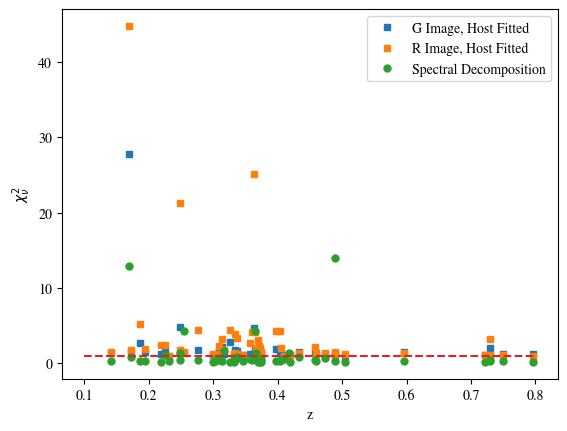

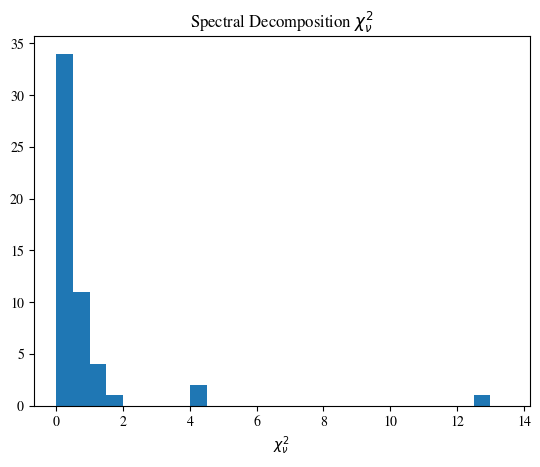

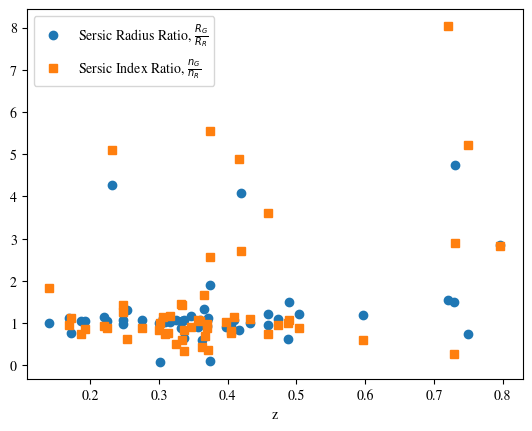

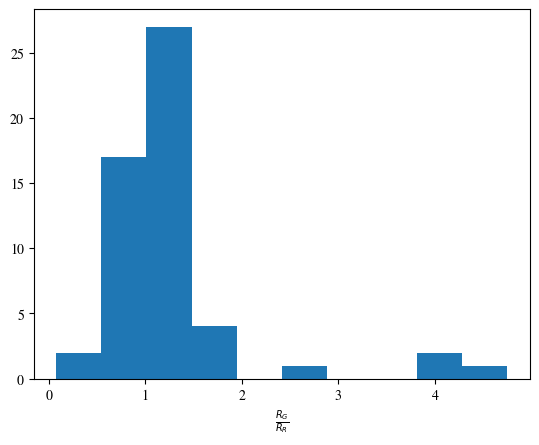

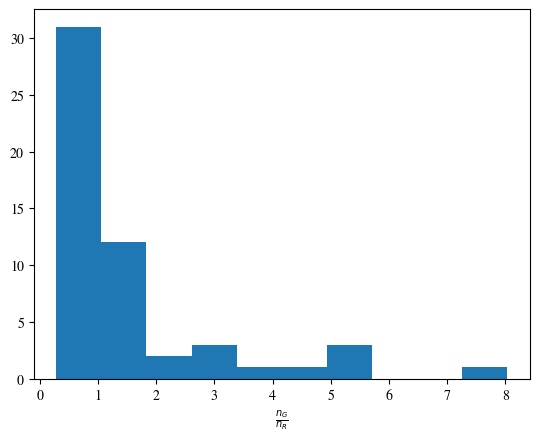

In [69]:
import matplotlib
#rchi2 comparison
DESI_HSC = pd.read_csv('data/DESICatalogue.csv')
#ffirst get list of continuum data files
specPath = r"results/PyQSOFit_test"
specFind = r".*_cont\.csv$" # search for cont csv files
specFiles = [file for file in list(os.listdir(specPath)) if re.search(specFind,file)]
print(specFiles)
imgPath = "results/desitargets/includinghost"
imgFiles = list(os.listdir(imgPath))
print(len(specFiles))
print(len(list(os.listdir(imgPath))))

print(specFiles[1][0:specFiles[1].index('_')])
#now include only spectral items which also appear in image decompositions
specFilesMatching = [fileName for fileName in specFiles if fileName[0:fileName.index('_')] in imgFiles]
print(specFilesMatching)
print(len(specFilesMatching))
objectNames = [name[:name.index('_')] for name in specFiles]

imgChiHost = {"G":[],"R":[]}
imgChiNoHost = {"G":[],"R":[]}
SersicR = {"G":[],"R":[]}
SersicN = {"G":[],"R":[]}
specChi = []
#Now gather data from both file lists
z = []
for i, object in enumerate(objectNames):
    try:
        noHostHSCResultG = pickle.load(open(f"results/desitargets/excludinghost/{object}/fitting_results/{object}-result-band-g.pkl","rb"))
        noHostHSCResultR = pickle.load(open(f"results/desitargets/excludinghost/{object}/fitting_results/{object}-result-band-r.pkl","rb"))
        hostHSCResultG = pickle.load(open(f"results/desitargets/includinghost/{object}/fitting_results/{object}-result-band-g.pkl","rb"))
        hostHSCResultR = pickle.load(open(f"results/desitargets/includinghost/{object}/fitting_results/{object}-result-band-r.pkl","rb"))
        specResult = np.loadtxt(f"{specPath}/{specFilesMatching[i]}",delimiter=",",skiprows=1,usecols=(2))[28]
    except FileNotFoundError:
        continue
    #in specresult, rchi2decomp is the value at index 28
    SersicR["G"].append(hostHSCResultG.final_result_galaxy[0]["R_sersic"])
    SersicN["G"].append(hostHSCResultG.final_result_galaxy[0]["n_sersic"])
    SersicR["R"].append(hostHSCResultR.final_result_galaxy[0]["R_sersic"])
    SersicN["R"].append(hostHSCResultR.final_result_galaxy[0]["n_sersic"])
    imgChiHost["G"].append(hostHSCResultG.reduced_Chisq)
    obj_No = list(DESI_HSC["DESI_ID"]).index(int(object))
    z.append(list(DESI_HSC["Z_DESI"])[obj_No])
    imgChiHost["R"].append(hostHSCResultR.reduced_Chisq)
    imgChiNoHost["G"].append(noHostHSCResultG.reduced_Chisq)
    imgChiNoHost["R"].append(noHostHSCResultR.reduced_Chisq)
    specChi.append(specResult)

sersicRadiusRatio = np.divide(SersicR["G"],SersicR["R"])
sersicIndexRatio = np.divide(SersicN["G"],SersicN["R"])

print(hostHSCResultG.final_result_galaxy[0])
print(len(specChi))
print(len(imgChiHost["G"]))
print(len(imgChiNoHost["G"]))
print(len(imgChiHost["R"]))
print(len(imgChiNoHost["R"]))
plt.plot(z,imgChiHost["G"],linestyle="None",marker="s",label="G Image, Host Fitted",markersize=5)
plt.plot(z,imgChiHost["R"],linestyle="None",marker="s",label="R Image, Host Fitted",markersize=5)
#plt.plot(z,imgChiNoHost["G"],linestyle="None",marker="x",label="Image, Host Not Fitted")
plt.plot(z,specChi,linestyle="None",marker="o",label="Spectral Decomposition",markersize=5)
plt.plot([0.1,0.8],[1,1],linestyle="dashed")
plt.legend(loc="best")
plt.xlabel("z")
plt.ylabel(r"$\chi^2_{\nu}$")
plt.figure()
plt.title(r"Spectral Decomposition $\chi^2_\nu$")
plt.hist(specChi,bins=np.arange(0,14,0.5))
plt.xlabel(r"$\chi^2_\nu$")
plt.figure()
plt.plot(z,sersicRadiusRatio,linestyle="None",marker="o",label = r"Sersic Radius Ratio, $\frac{R_G}{R_R}$")
plt.plot(z,sersicIndexRatio,linestyle="None",marker="s",label = r"Sersic Index Ratio, $\frac{n_G}{n_R}$")
plt.legend(loc="best")
plt.xlabel("z")
plt.figure()
plt.hist(sersicRadiusRatio)
plt.xlabel(r"$\frac{R_G}{R_R}$")
plt.figure()
plt.hist(sersicIndexRatio)
plt.xlabel(r"$\frac{n_G}{n_R}$")